In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./smsdata.csv')
df

,Unnamed: 0,address,body,BankTrancation
0,1,BW-SBGPPC,Transaction of INR 2000.00 made on Prepaid C...,Yes
1,2,BW-SBGPPC,Transaction of INR 3000.00 made on Prepaid C...,Yes
2,3,HP-TATAMF,Your Account Statement for recent transaction ...,no
3,4,BH-NSESMS,"Dear AODXXXXX8R,Your traded value for 12-JAN-1...",no
4,5,BH-NSESMS,"Dear AAMXXXXX1Q,Your traded value for 17-JAN-1...",no
...,...,...,...,...
488,489,BH-MBBSHN,GOOD NEWS\r\n\r\nStudents who want to take MBB...,No
489,490,BW-mbbsss,Lowest Pkgs\r\nReputed Clgs\r\nIn INDIA/ABROAD...,No
490,491,9.19E+11,I'll call you later.,No
491,492,BW-GMSHOP,GetMeShop- Online Shopping- Shop Stylish Cloth...,No


In [3]:
df.columns

Index(['Unnamed: 0', 'address', 'body', 'BankTrancation'], dtype='object')

In [4]:
df1=df[['body','BankTrancation']]
df1

,body,BankTrancation
0,Transaction of INR 2000.00 made on Prepaid C...,Yes
1,Transaction of INR 3000.00 made on Prepaid C...,Yes
2,Your Account Statement for recent transaction ...,no
3,"Dear AODXXXXX8R,Your traded value for 12-JAN-1...",no
4,"Dear AAMXXXXX1Q,Your traded value for 17-JAN-1...",no
...,...,...
488,GOOD NEWS\r\n\r\nStudents who want to take MBB...,No
489,Lowest Pkgs\r\nReputed Clgs\r\nIn INDIA/ABROAD...,No
490,I'll call you later.,No
491,GetMeShop- Online Shopping- Shop Stylish Cloth...,No


In [5]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
df1.head()

<ipython-input-5-5f27844235ee>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,body,BankTrancation
0,Transaction of INR 2000.00 made on Prepaid Card XXXX1407 on Mon Jan 01 11:36:47 IST 2018 at CASH-ATM/+1ST ASHRAM RD BRANCH /AHMADABAD CIT/1224/ . Current balance is INR 1410.00.,Yes
1,Transaction of INR 3000.00 made on Prepaid Card XXXX1407 on Mon Jan 08 16:23:12 IST 2018 at CASH-ATM/2ND ATM ASHRAM ROAD /AHMEDABAD /4063/ . Current balance is INR 3256.00.,Yes
2,"Your Account Statement for recent transaction in Folio No.3791641 with TATA Mutual Fund is available in the below link. Please click the below link (valid for 5 days) and enter your PAN in CAPITALS; in case PAN is not registered in the Folio, enter your Folio No to download the Statement of Account. www.camsonline.com/dnldresult.asp?fname=Ttotmcg3onrj845.pdf - TATAMF.",no
3,"Dear AODXXXXX8R,Your traded value for 12-JAN-18 CM Rs 26445 Check your registered email. For details contact broker.",no
4,"Dear AAMXXXXX1Q,Your traded value for 17-JAN-18 CM Rs 31240.1 Check your registered email. For details contact broker.",no


In [6]:
df1['BankTrancation'].value_counts()

No     400
Yes    73 
no     20 
Name: BankTrancation, dtype: int64

<h1>Punctuation Removal: </h1>


In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df1['clean_msg']= df1['body'].apply(lambda x:remove_punctuation(x))
df1.head()

<ipython-input-8-fc03b60bca3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_msg']= df1['body'].apply(lambda x:remove_punctuation(x))


,body,BankTrancation,clean_msg
0,Transaction of INR 2000.00 made on Prepaid Card XXXX1407 on Mon Jan 01 11:36:47 IST 2018 at CASH-ATM/+1ST ASHRAM RD BRANCH /AHMADABAD CIT/1224/ . Current balance is INR 1410.00.,Yes,Transaction of INR 200000 made on Prepaid Card XXXX1407 on Mon Jan 01 113647 IST 2018 at CASHATM1ST ASHRAM RD BRANCH AHMADABAD CIT1224 Current balance is INR 141000
1,Transaction of INR 3000.00 made on Prepaid Card XXXX1407 on Mon Jan 08 16:23:12 IST 2018 at CASH-ATM/2ND ATM ASHRAM ROAD /AHMEDABAD /4063/ . Current balance is INR 3256.00.,Yes,Transaction of INR 300000 made on Prepaid Card XXXX1407 on Mon Jan 08 162312 IST 2018 at CASHATM2ND ATM ASHRAM ROAD AHMEDABAD 4063 Current balance is INR 325600
2,"Your Account Statement for recent transaction in Folio No.3791641 with TATA Mutual Fund is available in the below link. Please click the below link (valid for 5 days) and enter your PAN in CAPITALS; in case PAN is not registered in the Folio, enter your Folio No to download the Statement of Account. www.camsonline.com/dnldresult.asp?fname=Ttotmcg3onrj845.pdf - TATAMF.",no,Your Account Statement for recent transaction in Folio No3791641 with TATA Mutual Fund is available in the below link Please click the below link valid for 5 days and enter your PAN in CAPITALS in case PAN is not registered in the Folio enter your Folio No to download the Statement of Account wwwcamsonlinecomdnldresultaspfnameTtotmcg3onrj845pdf TATAMF
3,"Dear AODXXXXX8R,Your traded value for 12-JAN-18 CM Rs 26445 Check your registered email. For details contact broker.",no,Dear AODXXXXX8RYour traded value for 12JAN18 CM Rs 26445 Check your registered email For details contact broker
4,"Dear AAMXXXXX1Q,Your traded value for 17-JAN-18 CM Rs 31240.1 Check your registered email. For details contact broker.",no,Dear AAMXXXXX1QYour traded value for 17JAN18 CM Rs 312401 Check your registered email For details contact broker


In [9]:
df1['clean_msg']=df1['clean_msg'].str.lower()

<ipython-input-9-89d7574cdcda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_msg']=df1['clean_msg'].str.lower()


In [10]:
df1['BankTrancation']=df1['BankTrancation'].str.lower()

<ipython-input-10-02b584c71159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BankTrancation']=df1['BankTrancation'].str.lower()


In [11]:
df1

,body,BankTrancation,clean_msg
0,Transaction of INR 2000.00 made on Prepaid Card XXXX1407 on Mon Jan 01 11:36:47 IST 2018 at CASH-ATM/+1ST ASHRAM RD BRANCH /AHMADABAD CIT/1224/ . Current balance is INR 1410.00.,yes,transaction of inr 200000 made on prepaid card xxxx1407 on mon jan 01 113647 ist 2018 at cashatm1st ashram rd branch ahmadabad cit1224 current balance is inr 141000
1,Transaction of INR 3000.00 made on Prepaid Card XXXX1407 on Mon Jan 08 16:23:12 IST 2018 at CASH-ATM/2ND ATM ASHRAM ROAD /AHMEDABAD /4063/ . Current balance is INR 3256.00.,yes,transaction of inr 300000 made on prepaid card xxxx1407 on mon jan 08 162312 ist 2018 at cashatm2nd atm ashram road ahmedabad 4063 current balance is inr 325600
2,"Your Account Statement for recent transaction in Folio No.3791641 with TATA Mutual Fund is available in the below link. Please click the below link (valid for 5 days) and enter your PAN in CAPITALS; in case PAN is not registered in the Folio, enter your Folio No to download the Statement of Account. www.camsonline.com/dnldresult.asp?fname=Ttotmcg3onrj845.pdf - TATAMF.",no,your account statement for recent transaction in folio no3791641 with tata mutual fund is available in the below link please click the below link valid for 5 days and enter your pan in capitals in case pan is not registered in the folio enter your folio no to download the statement of account wwwcamsonlinecomdnldresultaspfnamettotmcg3onrj845pdf tatamf
3,"Dear AODXXXXX8R,Your traded value for 12-JAN-18 CM Rs 26445 Check your registered email. For details contact broker.",no,dear aodxxxxx8ryour traded value for 12jan18 cm rs 26445 check your registered email for details contact broker
4,"Dear AAMXXXXX1Q,Your traded value for 17-JAN-18 CM Rs 31240.1 Check your registered email. For details contact broker.",no,dear aamxxxxx1qyour traded value for 17jan18 cm rs 312401 check your registered email for details contact broker
...,...,...,...
488,GOOD NEWS\r\n\r\nStudents who want to take MBBS Admission in Abroad SEPT2018\r\n\r\n#WITHOUT NEET\r\n#SAVE 1 YR\r\n#NO IELTS\r\n\r\nMBBS EUROPE\r\nGEORGIA\r\nUKRAINE\r\n\r\n9512884440\r\n9904184440,no,good news\r\n\r\nstudents who want to take mbbs admission in abroad sept2018\r\n\r\nwithout neet\r\nsave 1 yr\r\nno ielts\r\n\r\nmbbs europe\r\ngeorgia\r\nukraine\r\n\r\n9512884440\r\n9904184440
489,Lowest Pkgs\r\nReputed Clgs\r\nIn INDIA/ABROAD\r\nMBBS- 10L Pkg\r\nBDS- 8L Pkg\r\nBAMS- 15L Pkg\r\nBHMS- 5L Pkg\r\nBPT- 2.4L Pkg\r\nNursing- 3L Pkg\r\n\r\nCall 8000083232,no,lowest pkgs\r\nreputed clgs\r\nin indiaabroad\r\nmbbs 10l pkg\r\nbds 8l pkg\r\nbams 15l pkg\r\nbhms 5l pkg\r\nbpt 24l pkg\r\nnursing 3l pkg\r\n\r\ncall 8000083232
490,I'll call you later.,no,ill call you later
491,GetMeShop- Online Shopping- Shop Stylish Clothes for Men and Women with BIG SAVING. So Hurryyy Up. Free Shipping and Best Offers available on each order.\r\nhttp://getmeshop.in\r\nhttp://bit.ly/2LtbuaY,no,getmeshop online shopping shop stylish clothes for men and women with big saving so hurryyy up free shipping and best offers available on each order\r\nhttpgetmeshopin\r\nhttpbitly2ltbuay


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df1['clean_msg']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y = pd.get_dummies(df1['BankTrancation'])
y=y.iloc[:,1]
y

0      1
1      1
2      0
3      0
4      0
      ..
488    0
489    0
490    0
491    0
492    0
Name: yes, Length: 493, dtype: uint8

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [15]:
from sklearn.naive_bayes import MultinomialNB
multinomial=MultinomialNB()
multinomial.fit(x_train,y_train)

MultinomialNB()

In [16]:
y_pre=multinomial.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
import seaborn as sns

acc=accuracy_score(y_test,y_pre)
acc

0.8888888888888888

In [18]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)

GaussianNB()

In [19]:
y_pre2=gaussian.predict(x_test)

In [20]:
acc=accuracy_score(y_test,y_pre2)
acc

0.8181818181818182

In [21]:
pred_prob1=multinomial.predict_proba(x_test)
pred_prob2=gaussian.predict_proba(x_test)

In [22]:
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)




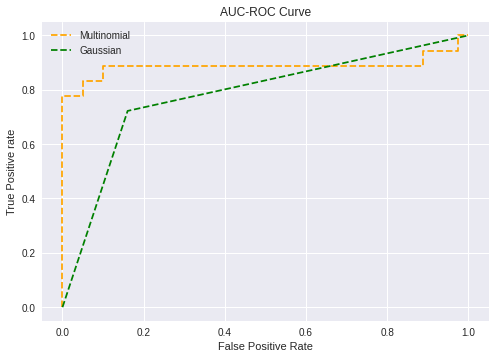

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Multinomial')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='Gaussian')

plt.title("AUC-ROC Curve")


# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()